<h2 style="color:blue;text-align:center;font-size:40px";>MID TERM TASK</h2>

In this notebook we will be working with a **advertising data set**, indicating whether or not a particular internet user clicked on an Advertisement on a company website. 

We will try to create a model that will **predict whether or not they will click on an ad based on the features (or data) gather for a particular user**.


---


This data set contains the following features:

* 'Daily Time Spent on Site': consumer time on site in minutes
* 'Age': cutomer age in years
* 'Area Income': Avg. Income of geographical area of consumer
* 'Daily Internet Usage': Avg. minutes a day consumer is on the internet
* 'Ad Topic Line': Headline of the advertisement
* 'City': City of consumer
* 'Male': Whether or not consumer was male
* 'Country': Country of consumer
* 'Timestamp': Time at which consumer clicked on Ad or closed window
* 'Clicked on Ad': 0 or 1 indicated clicking on Ad


---

<h3> Task-1. Take a first look at your data</h3>

<b>First things first,</b>we should import packages to our notebook

In [1]:
import pandas as pd
import numpy  as np


In [2]:
from sklearn import linear_model

# OSL() model can be used from statmodels package
import statsmodels.api as sm

# we will perform sampling using train_test_split module for training and testin set
# and we will use GridSearchCV to find the best parameters for SGDRegressor()
from sklearn.model_selection import train_test_split

from sklearn import preprocessing

# we will evaluate our models using RMSE(mean_squared_error) and Determination coefficient(r2_score)
from sklearn.metrics import mean_squared_error, r2_score

# in case you will use polinominal features
from sklearn.preprocessing import PolynomialFeatures

**Next,we read csv file into dataframe, perform info(), head(), describe and any other necessary first step function**

In [3]:
data = pd.read_csv("advertisement_data_logistic_regression.csv")

In [4]:
data.head()

,Unnamed: 0,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,0,68.95,35.0,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0.0,Tunisia,2016-03-27 0:53:11,0.0
1,1,80.23,31.0,68441.85,193.77,Monitored national standardization,West Jodi,1.0,Nauru,2016-04-04 1:39:02,0.0
2,2,69.47,26.0,NaN,NaN,Organic bottom-line service-desk,Davidton,0.0,San Marino,2016-03-13 20:35:42,0.0
3,3,NaN,NaN,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1.0,Italy,2016-01-10 2:31:19,0.0
4,4,68.37,35.0,73889.99,225.58,Robust logistical utilization,South Manuel,0.0,Iceland,2016-06-03 3:36:18,0.0


In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,1000.0,499.500000,288.819436,0.00,249.750,499.50,749.2500,999.00
Daily Time Spent on Site,902.0,65.171885,15.919591,32.60,51.515,68.70,78.6775,91.43
Age,909.0,35.995600,8.750707,19.00,29.000,35.00,42.0000,61.00
Area Income,913.0,55300.842607,13172.631848,13996.50,47638.300,57032.36,65620.2500,79484.80
Daily Internet Usage,907.0,179.353275,43.926032,104.78,138.405,182.11,218.3550,269.96
Male,928.0,0.478448,0.499805,0.00,0.000,0.00,1.0000,1.00
Clicked on Ad,895.0,0.498324,0.500277,0.00,0.000,0.00,1.0000,1.00


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                1000 non-null   int64  
 1   Daily Time Spent on Site  902 non-null    float64
 2   Age                       909 non-null    float64
 3   Area Income               913 non-null    float64
 4   Daily Internet Usage      907 non-null    float64
 5   Ad Topic Line             896 non-null    object 
 6   City                      908 non-null    object 
 7   Male                      928 non-null    float64
 8   Country                   910 non-null    object 
 9   Timestamp                 911 non-null    object 
 10  Clicked on Ad             895 non-null    float64
dtypes: float64(6), int64(1), object(4)
memory usage: 86.1+ KB


In [7]:
data.isnull().sum()

Unnamed: 0                    0
Daily Time Spent on Site     98
Age                          91
Area Income                  87
Daily Internet Usage         93
Ad Topic Line               104
City                         92
Male                         72
Country                      90
Timestamp                    89
Clicked on Ad               105
dtype: int64

**We can see that in our dataset a lot of missong values**

<h3>Task-2. Data preparation (handling missing values, outliers, irrelevant data, format, data types, detecting the features and target value, dividing into train and test sets)  </h3>

In [22]:
data_num=data.select_dtypes( include='number'  )
for i in data_num:
    data_num[i] = data_num[i].fillna((data_num[i].mean()))

<ipython-input-22-e1c0c6b68c30>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_num[i] = data_num[i].fillna((data_num[i].mean()))


In [23]:
data_num.isnull().sum()

Unnamed: 0                  0
Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Male                        0
Clicked on Ad               0
dtype: int64

**We select numerical type features and fill missing values to mean value on that column.After that I use data_num.isnull().sum() to demonstrate result**

<AxesSubplot:>

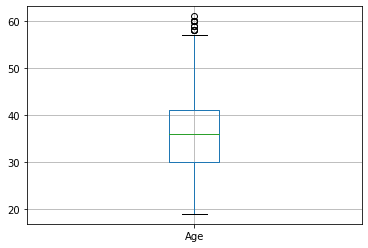

In [24]:
data_num[['Age']].boxplot()

In [69]:
Q1 = data_num.quantile(0.25)
Q3 = data_num.quantile(0.75)
IQR = Q3 - Q1
data_num = data_num[~((data_num < (Q1 - 1.5 * IQR)) |(data_num > (Q3 + 1.5 * IQR))).any(axis=1)]

**We will get IQR for each column.Then  we filter out the outliers by keeping only valid values.**

In [34]:
data=data.dropna()

In [35]:
data.isnull().sum()

Unnamed: 0                  0
Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Male                        0
Country                     0
Timestamp                   0
Clicked on Ad               0
dtype: int64

In [42]:
data_cat=data.select_dtypes( include='object' )
for i in data_cat:
    print(i,data_cat[i].unique())

Ad Topic Line ['Cloned 5thgeneration orchestration' 'Monitored national standardization'
 'Robust logistical utilization' 'Sharable client-driven software'
 'Reactive local challenge'
 'Team-oriented grid-enabled Local Area Network'
 'Centralized content-based focus group' 'Grass-roots coherent extranet'
 'Persistent demand-driven interface' 'Customizable multi-tasking website'
 'Grass-roots solution-oriented conglomeration'
 'Advanced 24/7 productivity' 'Streamlined non-volatile analyzer'
 'Future-proofed methodical protocol' 'Public-key foreground groupware'
 'Ameliorated client-driven forecast' 'Digitized global capability'
 'Intuitive exuding service-desk' 'Innovative user-facing extranet'
 'Front-line intermediate database' 'Reduced global support'
 'Organic leadingedge secured line'
 'Business-focused encompassing neural-net'
 'Centralized 24/7 installation' 'Pre-emptive value-added workforce'
 'Team-oriented encompassing portal' 'Organized global model'
 'Upgradable asynchronous

In [ ]:
for i in data_cat:
    if i!='date':
        dataset[i] = dataset[i].str.strip()
        LabelEncoder_ = preprocessing.LabelEncoder()
        dataset[i] = LabelEncoder_.fit_transform(dataset[i])

In [110]:
X = data_num[['Daily Time Spent on Site','Age','Area Income','Clicked on Ad']].copy()
Y=data_num[['Daily Internet Usage']].copy()

In [71]:
X.shape, Y.shape

((965, 4), (965, 1))

In [153]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0 )

In [146]:
x_train_ols =  sm.add_constant(x_train)
ols_model = sm.OLS(y_train, x_train, missing="drop").fit()
y_predicted_ols=ols_model.predict(x_test)

**Now we can use the train_test_split function in order to make the split. The test_size=0.3 inside the function indicates the percentage of the data that should be held over for testing.**


<h3>Task-3. Dummy model creation</h3>  


In [147]:
lr_model = linear_model.LinearRegression()

In [148]:
lr_model.fit(x_train, y_train)

LinearRegression()

In [154]:
print('Score:', lr_model.score(x_test, y_test))


Score: 0.49445825713205116


**We printed the accuracy score 0.49445825713205116**

<h3>Task-4. Improving the model </h3>

In [174]:
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score,cross_val_predict
from sklearn import linear_model, tree, ensemble
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection


In [142]:
skbest = SelectKBest(score_func=f_regression, k = 5)

In [143]:
y = data_num[['Daily Internet Usage']].copy()
X = data_num[['Daily Time Spent on Site','Age','Area Income','Clicked on Ad']].copy()

In [152]:
scores = cross_val_score(lr_model, X, y, cv=5)
print('Cross-validated scores:', scores)

Cross-validated scores: [0.48334997 0.5111376  0.48108023 0.43188777 0.52060877]


In [136]:
predictions = cross_val_predict(lr_model, X, y, cv=5)
accuracy = metrics.r2_score(y, predictions)
print('Cross-Predicted Accuracy:', accuracy)

Cross-Predicted Accuracy: 0.4906201183716955


**We performed 5-fold cross validation**

<h3>Task-5. Summary</h3>  


 **I’ve loaded in the data, split it into a training and testing sets, fitted a regression model to the training data, made predictions based on this data and tested the predictions on the test data.Firstly,I used dummy model to predict our target.Then I improved our model using by cross-calidation.It’s very similar to train/test split, but it’s applied to more subsets. Meaning, we split our data into k subsets, and train on k-1 one of those subset. What we do is to hold the last subset for test. We’re able to do it for each of the subsets. As you can see, the last fold improved the score of the original model — from 0.485 to 0.569.**